# NEXTdrawings TRIPLETS - stub.yamlStyle Approach
-  Karl Rosengren, PI; Heather Kirkorian, PI; Tim Rogers, PI;  University of Wisconsin – Madison
-  Clint Jensen, Graduate Student, University of Wisconsin – Madison

This script does some basic analysis and concatenates NEXT data. NEXT is an online suite of algorithms that allow for the presentation of stimuli (images, text, videos), so that participants can make judgments providing group level data about the set of stimuli presented. Additional tools within NEXT allow for the visualization of that data into representations, such as multidimensional spaces or rank order graphs. NEXT is hosted on AWS as an Amazon Machine Image (AMI). Participants for this project were Amazon MTurk workers. Each MTurk worker was asked to make 200 judgements and was paid 1 dollar for what was intended to be 10 minutes of work. 

### Script concatenates NEXTdrawings DAP, as well as CUBE and CYLINDER 2D and 3D Objects and Renderings data for Triplets NEXT data in format needed for stub.yaml file

#### Drawing Study 1: Drawing Across Media (DAM)

* Mediums: Children and adults copied simple shapes using each of three mediums (marker on paper, stylus on tablet, finger on tablet). 

* Shape copies: They copied 4 familiar shapes (circle=CI, square=SQ, triangle=TR, cross=CR) and 2 novel shapes (novel triangle=NT, novel cross=NC) using each of the three mediums, resulting in 18 shape copies per participant (1 for each shape/medium combination)

* Draw-a-person: They also drew a person using each of the three mediums (3 person drawings per participant). 


#### Drawing Study 3: Drawing 2D and 3D Objects and Renderings 
-- Study 3 also had children draw-a-person, which produced drawings used in our overall DAP analysis 

* Mediums: Children and adults copied simple shapes using each of three mediums (marker on paper, stylus on tablet, finger on tablet). 

* One 2D rendering was assigned to the marker-paper condition and the other was assigned to the two tablet conditions (stylus and finger). The opposite shape was used for 3D object drawings (e.g., if the paper condition has 2D cube and 3D cylinder, then the two tablet conditions have 3D cube and 2D cylinder).  
 
* For Study 3 DAP images, children drew one person at the end of the study during free draw, using a medium of their choice (they first chose a surface, then the marker/stylus was placed on the table to use if they wanted). 

### Code Book for Analysis Critical Elements
* Subject IDs for children are "DAM" followed by 3-digit number (e.g., DAM001). Subject IDs for adults are "DAMa" followed by 3-digit number (e.g., DAMa001). 
* marker on paper - (_P_)
* stylus on tablet - (_T_)
* finger on tablet - (_F_)


* Participant.ID - NEXT generated ID -- different from MTurk ID
* Timestamp - Date of participation -- stub.yaml requires a very specific format, script may need adjustment given potential .csv adjustments in Excel 
* Center - Image presented at top center -- images that the other two images are compared against for similarity judgement
* Left - Image presented at bottom left
* Right - Image presented at bottom right 
* Answer - Image participants chose as most similar to Center image
* Alg.label - All set to Test initially, these are adjusted to include 90% training designation and 10% test to create a hold out set for model fit comparisons
* Response.Time..s. - Response time for individual triplet set
* Participant.ID.sub - NEXT generated ID minus experimentID
* Condition - Name given to Study within this script
* Session - - NEXT generated ID experimentID

#### Setting CRAN to load packages (Might be necessary depending on how jupyter is loaded)

In [1]:
options(repos=structure(c(CRAN="https://rweb.crmda.ku.edu/cran/")))

#### Setting R to file where data is stored

# <font color='red'>  UPDATE NAME </font>

In [2]:
setwd("Z:/NEXT/NEXTdrawings/NEXTdrawingsData/DAP_Triplets/NEXT_Output")

ERROR: Error in setwd("Z:/NEXT/NEXTdrawings/NEXTdrawingsData/DAP_Triplets/NEXT_Output"): cannot change working directory


#### Loading packages used in analysis, plots, data managment

In [97]:
haspackage = require("dplyr")
if (haspackage==FALSE){
  install.packages("dplyr", dependencies = TRUE)
}


haspackage = require("tidyr") # used for data structure codes
if (haspackage==FALSE){
  install.packages("tidyr")
}
haspackage = require("stringr") # used for data structure codes
if (haspackage==FALSE){
  install.packages("stringr")
}


library("dplyr")
library("tidyr") 
library("stringr") 


In [98]:
filenames <- list.files(pattern="*.csv")

In [99]:
filenames

[1] "NEXTdrawings DAP Data 2019_04_15.csv"  
 [2] "NEXTdrawings DAP Data 2019_04_17.csv"  
 [3] "NEXTdrawings DAP Data 2019_04_18.csv"  
 [4] "NEXTdrawings DAP Data 2019_04_19.csv"  
 [5] "NEXTdrawings DAP Data 2019_04_22_1.csv"
 [6] "NEXTdrawings DAP Data 2019_04_22_2.csv"
 [7] "NEXTdrawings DAP Data 2019_04_23_1.csv"
 [8] "NEXTdrawings DAP Data 2019_04_23_2.csv"
 [9] "NEXTdrawings DAP Data 2019_04_27.csv"  
[10] "NEXTdrawings DAP Data 2019_05_01.csv"

In [100]:
Server_data <- list.files(pattern="*.csv", full.names = TRUE)
d_TRIPLETS <- do.call(rbind, lapply(Server_data,read.csv))

#### Checking data file

In [101]:
d_TRIPLETS

X,alg_id,alg_label,center_id,exp_uid,left_id,network_delay,participant_uid,query_uid,response_time,right_id,target_center,target_left,target_right,target_winner,timestamp_answer_received,timestamp_query_generated,winner_id
0,RandomSampling,Test,0,e519e56daae0294f84edc1a8c2d321,150,0.350802,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,87f1e338ab03e4ad4a74ce59ec21b87d,2.581,257,http://clintsbucket.s3.amazonaws.com/DAM001_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM062_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAMa001_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAMa001_T_DAPedit.jpg,2019-04-15 22:33:09.066264,2019-04-15 22:33:06.134462,257
1,RandomSampling,Test,20,e519e56daae0294f84edc1a8c2d321,30,0.165285,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,0fc93be4dd625934eecec7064698189e,1.389,161,http://clintsbucket.s3.amazonaws.com/DAM007_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM011_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM068_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM011_F_DAPedit.jpg,2019-04-15 22:33:11.029658,2019-04-15 22:33:09.475373,30
2,RandomSampling,Test,169,e519e56daae0294f84edc1a8c2d321,88,0.165073,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,265ff4570e6078797783e6c9570decc9,1.786,136,http://clintsbucket.s3.amazonaws.com/DAM072_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM033_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM054_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM054_T_DAPedit.jpg,2019-04-15 22:33:13.380478,2019-04-15 22:33:11.429405,136
3,RandomSampling,Test,201,e519e56daae0294f84edc1a8c2d321,207,0.295248,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,a068a12acae4faed6b4609a122bf5b8b,2.012,258,http://clintsbucket.s3.amazonaws.com/DAM083_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D002_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAMa002_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAMa002_F_DAPedit.jpg,2019-04-15 22:33:16.087552,2019-04-15 22:33:13.780304,258
4,RandomSampling,Test,127,e519e56daae0294f84edc1a8c2d321,157,0.154702,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,eb6aaf529b4f95a9c6cdc7e841a2d225,1.051,60,http://clintsbucket.s3.amazonaws.com/DAM051_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM065_F_DAPedt.jpg,http://clintsbucket.s3.amazonaws.com/DAM022_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM065_F_DAPedt.jpg,2019-04-15 22:33:17.650642,2019-04-15 22:33:16.444940,157
5,RandomSampling,Test,89,e519e56daae0294f84edc1a8c2d321,153,0.471933,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,6086b339be384d812211d37312f00e4e,0.428,83,http://clintsbucket.s3.amazonaws.com/DAM033_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM063_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM031_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM031_F_DAPedit.jpg,2019-04-15 22:33:18.912942,2019-04-15 22:33:18.013009,83
6,RandomSampling,Test,99,e519e56daae0294f84edc1a8c2d321,132,0.157249,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,ea30449a028ddee69f170aa41558d04f,0.508,22,http://clintsbucket.s3.amazonaws.com/DAM039_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM053_F_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM008_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM008_P_DAPedit.jpg,2019-04-15 22:33:19.956576,2019-04-15 22:33:19.291327,22
7,RandomSampling,Test,136,e519e56daae0294f84edc1a8c2d321,101,0.154147,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,beefeacab22a30f904e7d003969a1ba1,0.356,214,http://clintsbucket.s3.amazonaws.com/DAM054_T_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM040_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM3D011_P_DAPedit.jpg,http://clintsbucket.s3.amazonaws.com/DAM040_P_DAPedit.jpg,2019-04-15 22:33:20.848811,2019-04-15 22:33:20.338664,101
8,RandomSampling,Test,298,e519e56daae0294f84edc1a8c2d321,58,0.16

### Number of Participants Total

In [102]:
# how many subjects in total?
aggregate(participant_uid~participant_uid  , data=d_TRIPLETS, FUN=function(x) length(unique(x)))

participant_uid
218


### Total Number of NEXTdrawings Selections

In [103]:
d_TRIPLETS  %>% count("participant_uid")

"""participant_uid""",n
participant_uid,31832


In [104]:
Selections <-
 d_TRIPLETS %>%
 count(exp_uid, participant_uid, sort = TRUE)
Selections

exp_uid,participant_uid,n
e519e56daae0294f84edc1a8c2d321,e519e56daae0294f84edc1a8c2d321_o1IAGYTt7zoJ6JHCGaWAhStW98wiKI,200
e519e56daae0294f84edc1a8c2d321,e519e56daae0294f84edc1a8c2d321_yw9IYf6uVxXK9mtusj6EuxuQpTbojB,200
b6ee00a8c73840fff4aa4a9b6d86e1,b6ee00a8c73840fff4aa4a9b6d86e1_9ImFkphxGh2WdaWBatMtjeZFTGqu85,200
b6ee00a8c73840fff4aa4a9b6d86e1,b6ee00a8c73840fff4aa4a9b6d86e1_bGOXk18t9y22hkh9KHFw7nCX7xFWur,200
b6ee00a8c73840fff4aa4a9b6d86e1,b6ee00a8c73840fff4aa4a9b6d86e1_eahQJqUMyjTM9ttlkOYJrMipStBHga,200
b6ee00a8c73840fff4aa4a9b6d86e1,b6ee00a8c73840fff4aa4a9b6d86e1_oGMaMQzmXku9dIKaBYiLSya9CCWfVe,200
b6ee00a8c73840fff4aa4a9b6d86e1,b6ee00a8c73840fff4aa4a9b6d86e1_Vy82z46ikj2Grr8HkEYibYNC1Wdsqz,200
61b89e80442d16927d04333dbd7d7a,61b89e80442d16927d04333dbd7d7a_czvBQw78PX2Djm5Q1oAr4exJ9TbY90,200
61b89e80442d16927d04333dbd7d7a,61b89e80442d16927d04333dbd7d7a_j804i6tULAc5ofl8qWDZIvYHh0LPqf,200
61b89e80442d16927d04333dbd7d7a,61b89e80442d16927d04333dbd7d7a_M981jVH1hNXwhRomj9aOZB56yvP83S,200


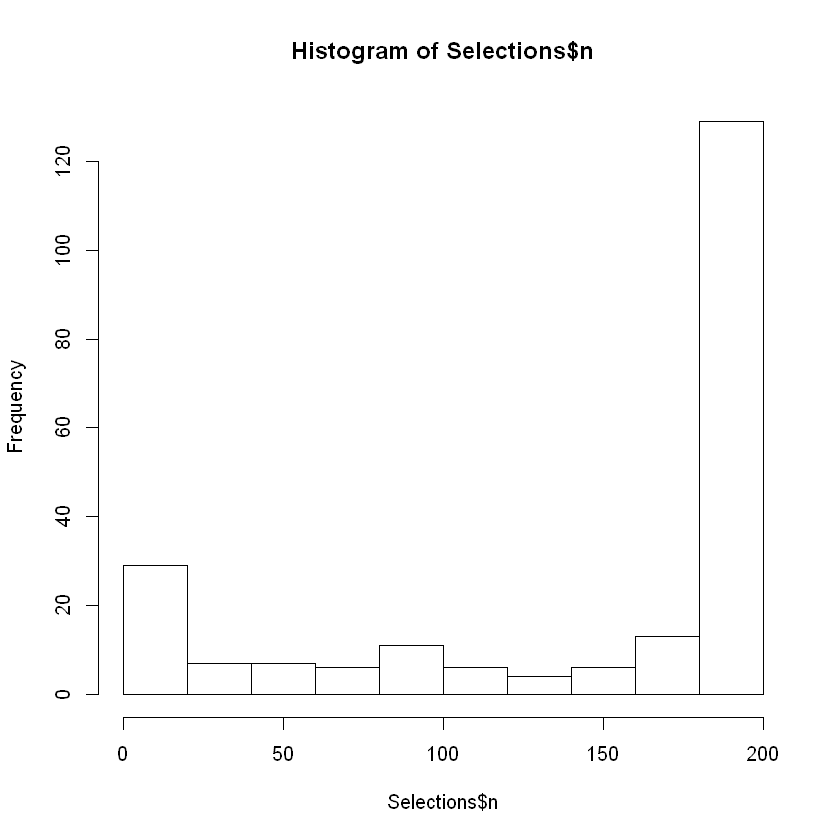

In [105]:
#Quick plot
hist(Selections$n)

#### Adjusting Dataframe for Visualization

In [106]:
#select( ) function: #Objective - Reduce dataframe size to only desired variables for current task

sub <- select(d_TRIPLETS,participant_uid, timestamp_answer_received, target_center, 
              target_left, target_right, target_winner, alg_label, response_time)

#### Removing underscores from variable names for clairity and renaming so that elements can be put in order stub.yaml requires

#### If you get a Warning message, check whether the image files are .jpg or .jpeg and change accordingly.

e.g. Warning message:
"Too few values at 22652 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ..."

In [107]:
# separating data based on underscore used in distinguishing common elements among variables
#separate( ) function: #Objective - Splitting a single variable into two
sub <- separate(sub, target_center, 
                        c("bucket1", "tc"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tc, 
                    c("Center", "bucket2"), sep = ".jpg", remove = TRUE, convert = FALSE)


sub <- separate(sub, target_right, 
                        c("bucket3", "tr"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tr, 
                        c("Right", "bucket4"), sep = ".jpg", remove = TRUE, convert = FALSE)

sub <- separate(sub, target_left, 
                        c("bucket5", "tl"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tl, 
                        c("Left", "bucket6"), sep = ".jpg", remove = TRUE,  convert = FALSE)

sub <- separate(sub, target_winner, 
                        c("bucket7", "tw"), sep = "http://clintsbucket.s3.amazonaws.com/", remove = TRUE, convert = FALSE)

sub <- separate(sub, tw, 
                        c("Answer", "bucket8"), sep = ".jpg", remove = TRUE,  convert = FALSE)

#### Selecting variables that are needed

In [110]:
d_TRIPLETS_sub <- select(sub,participant_uid, timestamp_answer_received, Center, Left, Right, Answer, alg_label, response_time)

#### Renaming Variables 

In [111]:
d_TRIPLETS_sub$Participant.ID <- d_TRIPLETS_sub$participant_uid

In [112]:
d_TRIPLETS_sub <- separate(d_TRIPLETS_sub, participant_uid, 
                            c("Session", "Participant.ID.sub"), sep = "_", remove = TRUE, convert = FALSE)

In [113]:
d_TRIPLETS_sub <- d_TRIPLETS_sub %>% 
  rename(
     Timestamp = timestamp_answer_received,
     Response.Time..s. = response_time,
     Alg.Label = alg_label
    )

# <font color='red'>  UPDATE NAME </font>

In [114]:
d_TRIPLETS_sub <- d_TRIPLETS_sub %>% 
  mutate(Condition = "DAPTriplets")

#### Checking state of data

In [115]:
d_TRIPLETS_sub

Session,Participant.ID.sub,Timestamp,Center,Left,Right,Answer,Alg.Label,Response.Time..s.,Participant.ID,Condition
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:09.066264,DAM001_F_DAPedit,DAM062_P_DAPedit,DAMa001_T_DAPedit,DAMa001_T_DAPedit,Test,2.581,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:11.029658,DAM007_T_DAPedit,DAM011_F_DAPedit,DAM068_F_DAPedit,DAM011_F_DAPedit,Test,1.389,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:13.380478,DAM072_P_DAPedit,DAM033_P_DAPedit,DAM054_T_DAPedit,DAM054_T_DAPedit,Test,1.786,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:16.087552,DAM083_T_DAPedit,DAM3D002_P_DAPedit,DAMa002_F_DAPedit,DAMa002_F_DAPedit,Test,2.012,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:17.650642,DAM051_P_DAPedit,DAM065_F_DAPedt,DAM022_P_DAPedit,DAM065_F_DAPedt,Test,1.051,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:18.912942,DAM033_T_DAPedit,DAM063_P_DAPedit,DAM031_F_DAPedit,DAM031_F_DAPedit,Test,0.428,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:19.956576,DAM039_P_DAPedit,DAM053_F_DAPedit,DAM008_P_DAPedit,DAM008_P_DAPedit,Test,0.508,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:20.848811,DAM054_T_DAPedit,DAM040_P_DAPedit,DAM3D011_P_DAPedit,DAM040_P_DAPedit,Test,0.356,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:21.767619,DAMa022_F_DAPedit,DAM021_T_DAPedit,DAM081_T_DAPedit,DAM081_T_DAPedit,Test,0.373,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:22.661034,DAM016_P_DAPedit,DAM065_P_DAPedit,DAM3D056_T_DAPedit,DAM3D056_T_DAPedit,Test,0.361,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets


#### Creating a Random Number to turn some trials into Training cases and some into Test for holdout model comparison

In [116]:
d_TRIPLETS_sub$RandNum <- sample(10, size = nrow(d_TRIPLETS_sub), replace = TRUE)

In [117]:
d_TRIPLETS_sub

Session,Participant.ID.sub,Timestamp,Center,Left,Right,Answer,Alg.Label,Response.Time..s.,Participant.ID,Condition,RandNum
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:09.066264,DAM001_F_DAPedit,DAM062_P_DAPedit,DAMa001_T_DAPedit,DAMa001_T_DAPedit,Test,2.581,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,5
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:11.029658,DAM007_T_DAPedit,DAM011_F_DAPedit,DAM068_F_DAPedit,DAM011_F_DAPedit,Test,1.389,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,4
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:13.380478,DAM072_P_DAPedit,DAM033_P_DAPedit,DAM054_T_DAPedit,DAM054_T_DAPedit,Test,1.786,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,7
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:16.087552,DAM083_T_DAPedit,DAM3D002_P_DAPedit,DAMa002_F_DAPedit,DAMa002_F_DAPedit,Test,2.012,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,9
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:17.650642,DAM051_P_DAPedit,DAM065_F_DAPedt,DAM022_P_DAPedit,DAM065_F_DAPedt,Test,1.051,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,5
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:18.912942,DAM033_T_DAPedit,DAM063_P_DAPedit,DAM031_F_DAPedit,DAM031_F_DAPedit,Test,0.428,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,10
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:19.956576,DAM039_P_DAPedit,DAM053_F_DAPedit,DAM008_P_DAPedit,DAM008_P_DAPedit,Test,0.508,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,6
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:20.848811,DAM054_T_DAPedit,DAM040_P_DAPedit,DAM3D011_P_DAPedit,DAM040_P_DAPedit,Test,0.356,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,8
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:21.767619,DAMa022_F_DAPedit,DAM021_T_DAPedit,DAM081_T_DAPedit,DAM081_T_DAPedit,Test,0.373,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,9
e519e56daae0294f84edc1a8c2d321,rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,2019-04-15 22:33:22.661034,DAM016_P_DAPedit,DAM065_P_DAPedit,DAM3D056_T_DAPedit,DAM3D056_T_DAPedit,Test,0.361,e519e56daae0294f84edc1a8c2d321_rtGWcj7gtlQm9PDLaKRFVFKpVhozDb,DAPTriplets,4


In [118]:
d_TRIPLETS_sub <- d_TRIPLETS_sub %>%
     mutate(Alg.Label= sub("Test", "Train",Alg.Label))

In [119]:
TRIPLETS_data <- d_TRIPLETS_sub %>% mutate(Alg.Label = ifelse(Alg.Label == "Train" & RandNum == 1, "Test", "Train"))

#### Removing Random Number created for model comparison

In [120]:
TRIPLETS_data <- select (TRIPLETS_data,-c(RandNum))

#### Reorganizing variables for stub.yaml processing

In [121]:
TRIPLETS_data <- TRIPLETS_data[,c("Participant.ID","Timestamp","Center","Left","Right","Answer",
          "Alg.Label","Response.Time..s.","Participant.ID.sub","Condition","Session")]

### Export data file

# <font color='red'>  UPDATE NAME </font>

In [122]:
setwd("Z:/NEXT/NEXTdrawings/NEXTdrawingsData/DAP_Triplets")

write.csv(TRIPLETS_data, file = "stub.yamlStyle_DAP_Triplets_data.csv")